<AxesSubplot:>

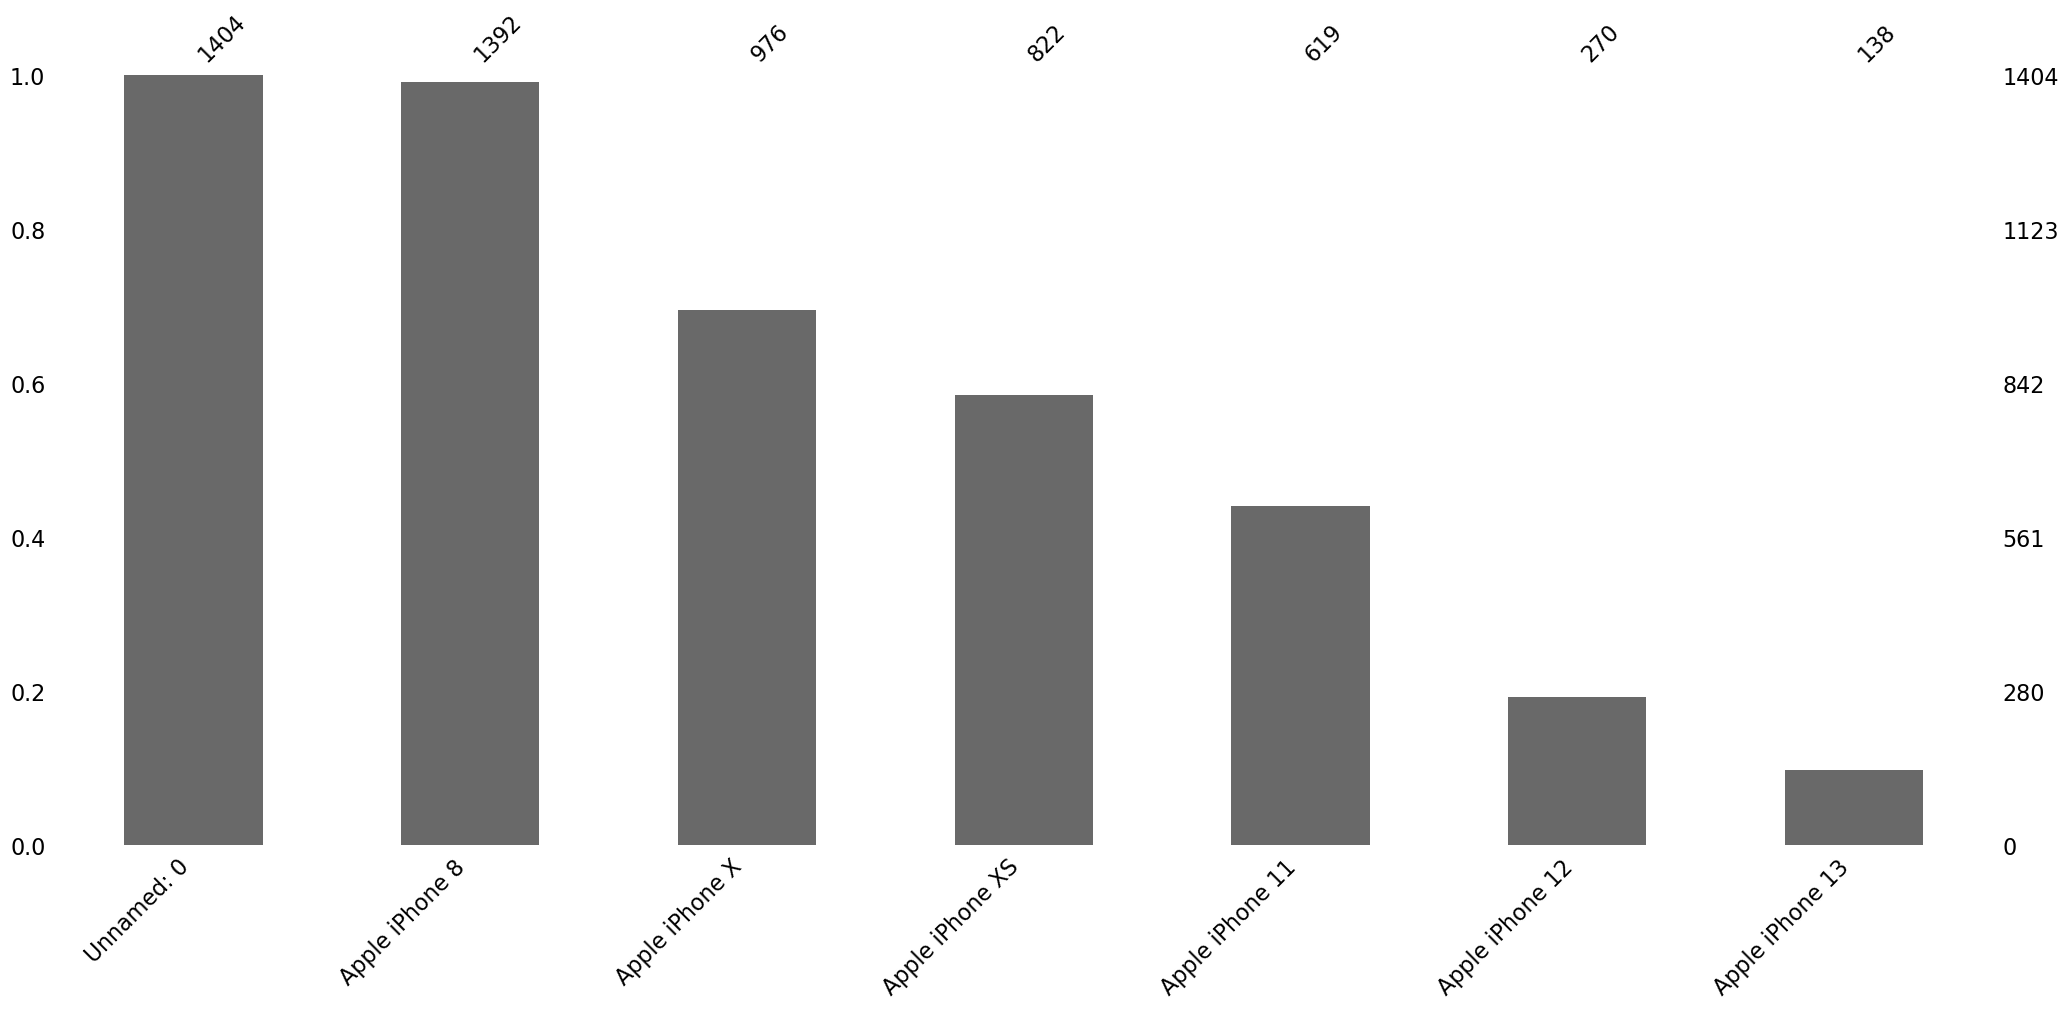

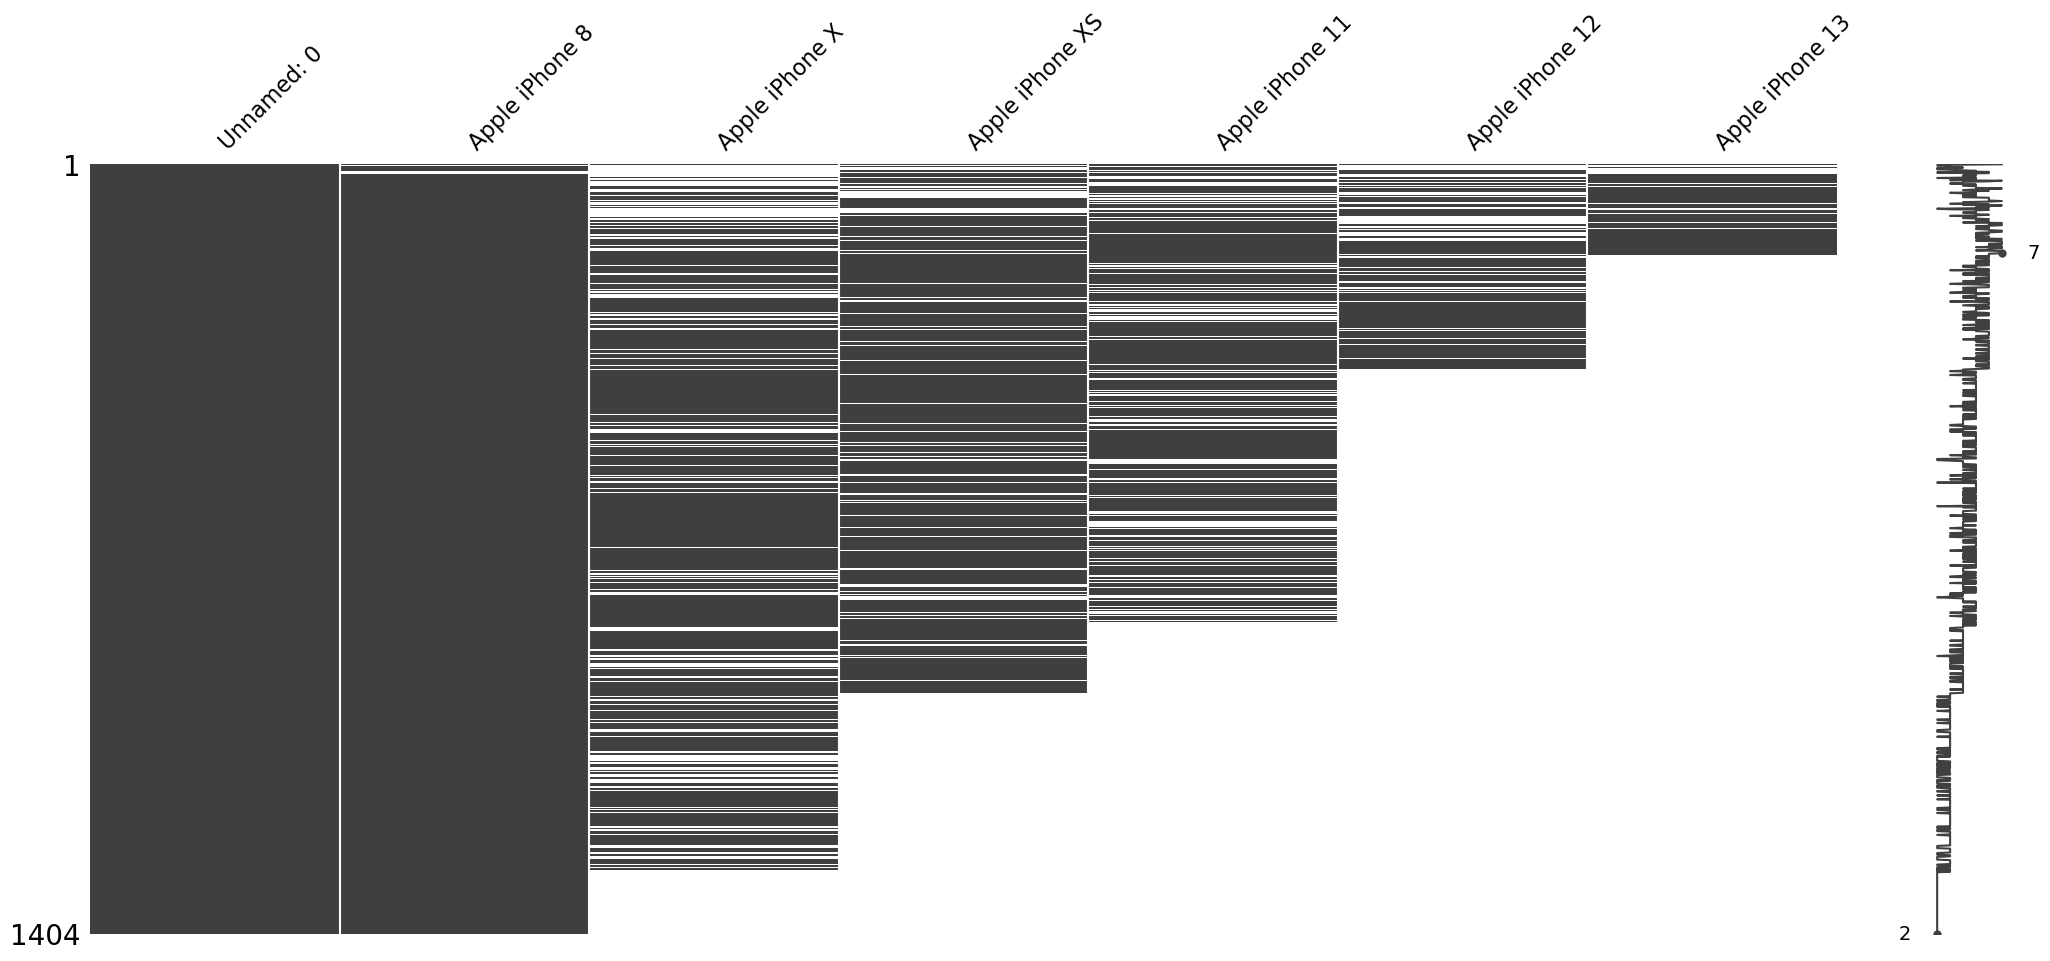

In [1]:
import missingno as msno
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

Keepa_iP = pd.read_csv(r"/Users/ytsang/Desktop/Github/Pricing/iPhone.csv")
Howmuch_iP = pd.read_excel("/Users/ytsang/Desktop/Github/Pricing/iPhone.xlsx")
Keepa_iP_prep_modified = pd.read_csv(r"/Users/ytsang/Desktop/Github/Pricing/iPhone KNN 5 processed adjusted.csv")

#visualization of missing data: https://www.analyticsvidhya.com/blog/2021/10/how-to-deal-with-missing-data-using-python/ 
msno.bar(Keepa_iP)
msno.matrix(Keepa_iP)


In [2]:
#Pre-processing: Missing NaN by listwise deletion
Keepa_iP_8X = Keepa_iP.iloc[:,0:3]
Keepa_iP_1 = Keepa_iP_8X.copy()
Keepa_iP_8X_1 = Keepa_iP_1.dropna() #976 rows

Keepa_iP_8XXS = Keepa_iP.iloc[:,0:4]
Keepa_iP_2 = Keepa_iP_8XXS.copy()
Keepa_iP_8XXS_2 = Keepa_iP_2.dropna() #644 rows

Keepa_iP_8XXS11 = Keepa_iP.iloc[:,0:5]
Keepa_iP_3 = Keepa_iP_8XXS11.copy()
Keepa_iP_8XXS11_3 = Keepa_iP_3.dropna() #419 rows

In [3]:
#Normalization
Keepa_iP_8X_1 = preprocessing.normalize(Keepa_iP_8X_1, axis=0)
Keepa_iP_8X_1 = pd.DataFrame(Keepa_iP_8X_1)

Keepa_iP_8XXS_2 = preprocessing.normalize(Keepa_iP_8XXS_2, axis=0)
Keepa_iP_8XXS_2 = pd.DataFrame(Keepa_iP_8XXS_2)

Keepa_iP_8XXS11_3 = preprocessing.normalize(Keepa_iP_8XXS11_3, axis=0)
Keepa_iP_8XXS11_3 = pd.DataFrame(Keepa_iP_8XXS11_3)
col1 = ['Day','iPhone 8','iPhone X']
col2 = ['Day','iPhone 8','iPhone X','iPhone XS']
col3 = ['Day','iPhone 8','iPhone X', 'iPhone XS','iPhone 11'] 
Keepa_iP_8X_1.columns = col1
Keepa_iP_8XXS_2.columns = col2
Keepa_iP_8XXS11_3.columns = col3

In [4]:
#Correlation between models across time
fea1 = ['iPhone 8','iPhone X']
fea2 = ['iPhone 8','iPhone X','iPhone XS']
fea3 = ['iPhone 8','iPhone X', 'iPhone XS','iPhone 11'] 
corr1 = Keepa_iP_8X_1[fea1].corr()
corr2 = Keepa_iP_8XXS_2[fea2].corr()
corr3 = Keepa_iP_8XXS11_3[fea3].corr()
print(corr1,corr2,corr3)

          iPhone 8  iPhone X
iPhone 8  1.000000  0.930395
iPhone X  0.930395  1.000000            iPhone 8  iPhone X  iPhone XS
iPhone 8   1.000000  0.903618   0.917273
iPhone X   0.903618  1.000000   0.935719
iPhone XS  0.917273  0.935719   1.000000            iPhone 8  iPhone X  iPhone XS  iPhone 11
iPhone 8   1.000000  0.886613   0.894200   0.900522
iPhone X   0.886613  1.000000   0.930052   0.863643
iPhone XS  0.894200  0.930052   1.000000   0.832840
iPhone 11  0.900522  0.863643   0.832840   1.000000


In [5]:
# Eigenvalues
r1 = Keepa_iP_8X_1[fea1]
pca1 = PCA(n_components=2)
pca1.fit(r1)
X_1 = pca1.transform(r1)
print(pca1.singular_values_**2)

r2 = Keepa_iP_8XXS_2[fea2]
pca2 = PCA(n_components=3)
pca2.fit(r2)
X_2 = pca2.transform(r2)
print(pca2.singular_values_**2)

r3 = Keepa_iP_8XXS11_3[fea3]
pca3 = PCA(n_components=4)
pca3.fit(r3)
X_3 = pca3.transform(r3)
print(pca3.singular_values_**2)

[0.26495606 0.00946647]
[0.2485918  0.00975822 0.00459832]
[0.24182185 0.01113491 0.00665337 0.00375077]


In [6]:
# Eigenvectors
print(pca1.components_)
print(pca2.components_)
print(pca3.components_)

[[ 0.74128813  0.67118694]
 [ 0.67118694 -0.74128813]]
[[ 0.65545754  0.55971077  0.50704958]
 [-0.74066258  0.6076343   0.28670454]
 [-0.1476291  -0.5634753   0.81283531]]
[[ 0.57781438  0.5405248   0.45203804  0.41185567]
 [-0.51765468  0.55519412  0.43724174 -0.48229948]
 [ 0.54904767 -0.34530127  0.3341458  -0.68385692]
 [ 0.31098367  0.52948982 -0.70201699 -0.36069632]]


In [7]:
#variance ratio
print(pca1.explained_variance_ratio_)
print(pca2.explained_variance_ratio_)
print(pca3.explained_variance_ratio_)

[0.96550404 0.03449596]
[0.94540169 0.03711079 0.01748753]
[0.91821468 0.04228005 0.02526333 0.01424195]


In [8]:
#cum. variance ratio
print(pca1.explained_variance_ratio_.cumsum())
print(pca2.explained_variance_ratio_.cumsum())
print(pca3.explained_variance_ratio_.cumsum())

[0.96550404 1.        ]
[0.94540169 0.98251247 1.        ]
[0.91821468 0.96049473 0.98575805 1.        ]


[-0.53767254 -0.61305745]


LinearRegression()

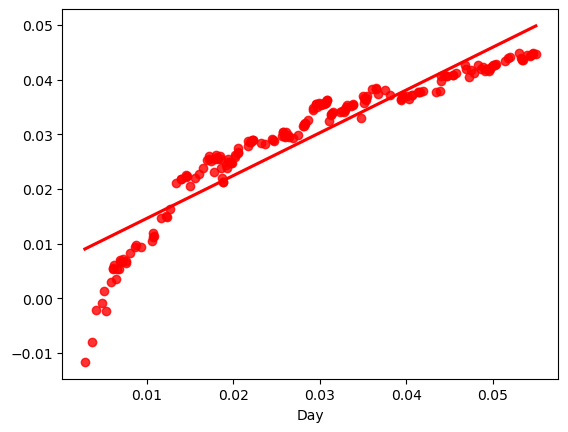

In [9]:
#ML regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns

X1 = Keepa_iP_8X_1[fea1]
y1 = Keepa_iP_8X_1['Day']

X2 = Keepa_iP_8XXS_2[fea2]
y2 = Keepa_iP_8XXS_2['Day']

X3 = Keepa_iP_8XXS11_3[fea3]
y3 = Keepa_iP_8XXS11_3['Day']

#Spilt set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.20, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.20, random_state=43)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3, test_size=0.20, random_state=44)


regr = linear_model.LinearRegression()
regr.fit(X1_train,y1_train)
y1_pred = regr.predict(X1_test)
sns.regplot(x=y1_test, y=y1_pred, ci=None,color='red')
print(regr.coef_)
regr.fit(X2_train,y2_train)

[-0.75431128  0.14765314 -0.79006346]


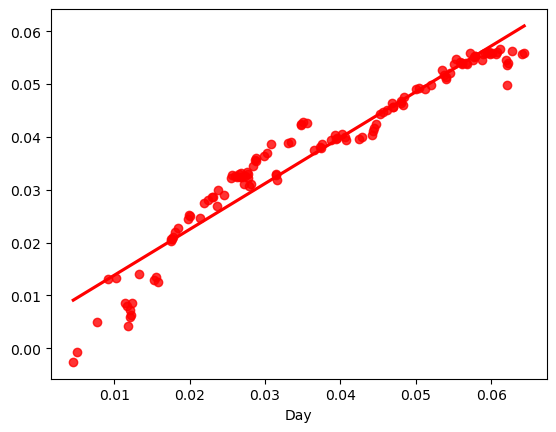

In [10]:
regr.fit(X2_train,y2_train)
y2_pred = regr.predict(X2_test)
sns.regplot(x=y2_test, y=y2_pred, ci=None,color='red')
print(regr.coef_)

[-0.25929835  0.18938836 -0.62470815 -1.23314099]


,Actual,Predict,Difference
258,0.051561,0.054526,-0.002965
122,0.030522,0.030264,0.000257
277,0.055413,0.052840,0.002573
174,0.038325,0.041378,-0.003053
68,0.019360,0.023304,-0.003944
...,...,...,...
78,0.020940,0.022210,-0.001269
370,0.071711,0.068770,0.002942
175,0.038424,0.042780,-0.004356
124,0.030719,0.028286,0.002433


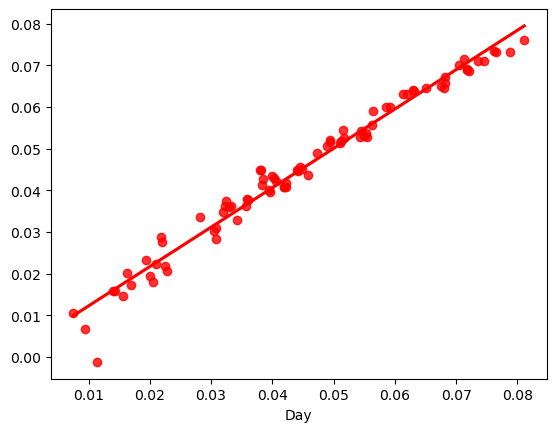

In [11]:
regr.fit(X3_train,y3_train)
y3_pred = regr.predict(X3_test)
sns.regplot(x=y3_test, y=y3_pred, ci=None,color='red')
print(regr.coef_)

y_pred3 = pd.DataFrame({'Actual':y3_test, 'Predict': y3_pred, 'Difference':y3_test-y3_pred})
y_pred3

In [14]:
import matplotlib as plt

Plot3 = plt.figure(1)
plt.figure(figsize=(6, 5))
plt.title("Plot3", size=16)
plt.scatter(X3_train, y3_train, label="data point")
plt.plot(X3_train, y3_train, c="red", label="predicted")
plt.legend()
warranty.show()

TypeError: 'module' object is not callable

In [ ]:
#Pre-processing: Missing NaN by Means Subs
from sklearn.impute import KNNImputer
preprocessor = KNNImputer(n_neighbors=3, weights="distance")
preprocessor.fit(Keepa_iP)
Keepa_iP_prep = preprocessor.transform(Keepa_iP)
columns = ['Day','iPhone 8','iPhone X','iPhone XS', 'iPhone 11', 'iPhone 12', 'iPhone 13']
Keepa_iP_processed = pd.DataFrame(Keepa_iP_prep)
Keepa_iP_processed.columns = columns
Keepa_iP_processed.to_csv('iPhone KNN 5 processed.csv')

In [ ]:
#Keepa_iP_prep_modified = pd.read_csv(r"/Users/cheungk/Library/CloudStorage/OneDrive-HKUSTConnect/Academics/2023 year/2223 Fall/Group Projects/3302 Group 3/code/Analysis/iPhone KNN 5 processed adjusted.csv")
Keepa_iP_prep_modified

,Unnamed: 0,Day,iPhone 8,iPhone X,iPhone XS,iPhone 11,iPhone 12,iPhone 13
0,0,0,699.9900,899.990000,849.990000,709.990000,829.990000,729.990000
1,1,1,659.9900,921.757927,816.421402,731.923244,804.990000,879.539435
2,2,2,699.9900,897.669959,810.102000,729.000000,804.183158,763.012206
3,3,3,759.9900,894.631870,810.974187,744.425714,804.990000,764.067683
4,4,4,659.9900,896.689509,824.990000,721.807326,806.244835,921.464408
...,...,...,...,...,...,...,...,...
1399,1399,1399,140.4925,0.000000,0.000000,0.000000,0.000000,0.000000
1400,1400,1400,131.4750,0.000000,0.000000,0.000000,0.000000,0.000000
1401,1401,1401,142.9850,0.000000,0.000000,0.000000,0.000000,0.000000
1402,1402,1402,142.9500,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
#Normalization
Keepa_iP_prep_modified = preprocessing.normalize(Keepa_iP_prep_modified, axis=0)
Keepa_iP_prep_modified = pd.DataFrame(Keepa_iP_prep_modified)
columns = ['ID','Day','iPhone 8','iPhone X','iPhone XS', 'iPhone 11', 'iPhone 12', 'iPhone 13']
Keepa_iP_prep_modified.columns = columns
Keepa_iP_prep_modified
#Keepa_iP_prep_modified.var()

,ID,Day,iPhone 8,iPhone X,iPhone XS,iPhone 11,iPhone 12,iPhone 13
0,0.000000,0.000000,0.057587,0.053973,0.067677,0.043403,0.064234,0.076522
1,0.000033,0.000033,0.054296,0.055279,0.065004,0.044744,0.062299,0.092199
2,0.000066,0.000066,0.057587,0.053834,0.064501,0.044565,0.062236,0.079983
3,0.000099,0.000099,0.062523,0.053652,0.064571,0.045508,0.062299,0.080094
4,0.000132,0.000132,0.054296,0.053775,0.065687,0.044126,0.062396,0.096593
...,...,...,...,...,...,...,...,...
1399,0.046085,0.046085,0.011558,0.000000,0.000000,0.000000,0.000000,0.000000
1400,0.046118,0.046118,0.010816,0.000000,0.000000,0.000000,0.000000,0.000000
1401,0.046151,0.046151,0.011763,0.000000,0.000000,0.000000,0.000000,0.000000
1402,0.046184,0.046184,0.011760,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
#Correlation between models across time
feature = ['iPhone 8','iPhone X','iPhone XS', 'iPhone 11', 'iPhone 12']
corr = Keepa_iP_prep_modified[feature].corr()
print(corr)

           iPhone 8  iPhone X  iPhone XS  iPhone 11  iPhone 12
iPhone 8   1.000000  0.917872   0.873039   0.852596   0.906134
iPhone X   0.917872  1.000000   0.910021   0.844078   0.826692
iPhone XS  0.873039  0.910021   1.000000   0.915065   0.746444
iPhone 11  0.852596  0.844078   0.915065   1.000000   0.719905
iPhone 12  0.906134  0.826692   0.746444   0.719905   1.000000


In [ ]:
# Eigenvalues
reduced_data = Keepa_iP_prep_modified[feature]
pca = PCA(n_components=5)
pca.fit(reduced_data)
X_1 = pca.transform(reduced_data)
print(pca.singular_values_**2)

[1.70882677 0.19410414 0.04344234 0.02030932 0.01167301]


In [ ]:
# Eigenvectors
print(pca.components_)

[[ 0.32925612  0.33992872  0.43984862  0.45823222  0.61040584]
 [-0.05439226  0.09330229  0.42782979  0.52687338 -0.72643119]
 [ 0.08148733  0.56452866  0.43691266 -0.67540512 -0.16613987]
 [ 0.41358826  0.58228407 -0.64477283  0.17152561 -0.21151117]
 [ 0.84317048 -0.46690021  0.12988525 -0.1638126  -0.16541763]]


In [ ]:
#variance ratio
pca.explained_variance_ratio_

array([0.86376119, 0.09811388, 0.02195881, 0.01026576, 0.00590036])

In [ ]:
#cum. variance ratio
pca.explained_variance_ratio_.cumsum()

array([0.86376119, 0.96187507, 0.98383388, 0.99409964, 1.        ])

In [ ]:
#ML regression
from sklearn import linear_model
X = Keepa_iP_prep_modified[fea1]
y = Keepa_iP_prep_modified['Day']


regr = linear_model.LinearRegression()
regr.fit(X,y)
print(regr.coef_)

[-0.31441405 -0.71889094]


In [38]:
#Plot graph with 2 data
Keepa_iP_prep_modified

,Unnamed: 0,Day,iPhone 8,iPhone X,iPhone XS,iPhone 11,iPhone 12,iPhone 13
0,0,0,699.9900,899.990000,849.990000,709.990000,829.990000,729.990000
1,1,1,659.9900,921.757927,816.421402,731.923244,804.990000,879.539435
2,2,2,699.9900,897.669959,810.102000,729.000000,804.183158,763.012206
3,3,3,759.9900,894.631870,810.974187,744.425714,804.990000,764.067683
4,4,4,659.9900,896.689509,824.990000,721.807326,806.244835,921.464408
...,...,...,...,...,...,...,...,...
1399,1399,1399,140.4925,0.000000,0.000000,0.000000,0.000000,0.000000
1400,1400,1400,131.4750,0.000000,0.000000,0.000000,0.000000,0.000000
1401,1401,1401,142.9850,0.000000,0.000000,0.000000,0.000000,0.000000
1402,1402,1402,142.9500,0.000000,0.000000,0.000000,0.000000,0.000000


In [189]:
Keepa_iP8 = pd.read_excel('iPhone8 KNN.xlsx')

In [171]:
#Try on polynomial regression
Keepa_iP8 = Keepa_iP8[['Day', 'Price']]
#Keepa_iP8 = pd.DataFrame(Keepa_iP8)
#Keepa_iP8['Day'] = Keepa_iP8.index
Keepa_iP8.columns =['Day', 'iPhone']
Keepa_iP8.sample(10)

,Day,iPhone
356105,292,490.62
309266,292,489.70
450893,335,508.21
200630,289,493.01
563838,887,272.00
245370,291,491.00
345820,292,490.57
367235,292,490.90
229262,290,492.07
374626,292,490.88


In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, model_selection

In [173]:
# set display options
pd.options.display.max_rows, pd.options.display.max_columns = 10, 25

In [174]:
# slim the data by picking target and features
target = ['iPhone']
features = ['Day']

In [175]:
# This function returns a new dataframe,
# which contains all powers of features from 2 to what you like.

def create_poly_feature(df, feature, degree):
    result = pd.DataFrame()
    if feature in df.columns:
        # loop over the degrees:
        for power in range(2,  degree+1): 
            # first we'll give the column a name:
            name = feature + '_power_' + str(power)

            # then assign df[name] to the appropriate power of feature
            result[name] = df[feature].astype(float) ** power
        return result
    else:
        return print("Please select a feature in this df!")

In [181]:
poly_model_4 = linear_model.LinearRegression()
poly_model_5 = linear_model.LinearRegression()
poly_model_6 = linear_model.LinearRegression()
poly_model_7 = linear_model.LinearRegression()

In [182]:
# 1. create polynomial features
col_poly_sqft_4 = create_poly_feature(Keepa_iP8, 'Day', 4)
col_poly_sqft_5 = create_poly_feature(Keepa_iP8, 'Day', 5)
col_poly_sqft_6 = create_poly_feature(Keepa_iP8, 'Day', 6)
col_poly_sqft_7 = create_poly_feature(Keepa_iP8, 'Day', 7)

# 2. concatinate polynomial features with slim data
sales_processed_4 = pd.concat([col_poly_sqft_4,Keepa_iP8], axis=1)
sales_processed_5 = pd.concat([col_poly_sqft_5,Keepa_iP8], axis=1)
sales_processed_6 = pd.concat([col_poly_sqft_6,Keepa_iP8], axis=1)
sales_processed_7 = pd.concat([col_poly_sqft_7,Keepa_iP8], axis=1)

# 3. split target and features
X_4 = sales_processed_4.drop('iPhone',axis = 1).values
X_5 = sales_processed_5.drop('iPhone',axis = 1).values
X_6 = sales_processed_6.drop('iPhone',axis = 1).values
X_7 = sales_processed_7.drop('iPhone',axis = 1).values
Y = Keepa_iP8['iPhone'].values

In [183]:
poly_model_4.fit(X_4,Y)
poly_model_5.fit(X_5, Y)
poly_model_6.fit(X_6, Y)
poly_model_7.fit(X_7,Y)

LinearRegression()

In [184]:
# 1. give 100 segment points from the min to max
sample_points = np.linspace(Keepa_iP8['iPhone'].min(), Keepa_iP8['iPhone'].max(), 20000)

In [185]:
# 2. build a dataframe as sales
x_plot = pd.DataFrame(sample_points, columns=['sampled'])

# 3. create polynomial features and do prediction
col_poly_pred_4 = create_poly_feature(x_plot, 'sampled', 4)
col_poly_pred_5 = create_poly_feature(x_plot, 'sampled', 5)
col_poly_pred_6 = create_poly_feature(x_plot, 'sampled', 6)
col_poly_pred_7 = create_poly_feature(x_plot, 'sampled', 7)

sample_processed_4 = pd.concat([col_poly_pred_4, x_plot], axis=1)
sample_processed_5 = pd.concat([col_poly_pred_5, x_plot], axis=1)
sample_processed_6 = pd.concat([col_poly_pred_6, x_plot], axis=1)
sample_processed_7 = pd.concat([col_poly_pred_7, x_plot], axis=1)

y_plot_4 = poly_model_4.predict(sample_processed_4)
y_plot_5 = poly_model_5.predict(sample_processed_5)
y_plot_6 = poly_model_6.predict(sample_processed_6)
y_plot_7 = poly_model_7.predict(sample_processed_7)

/Users/ytsang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/ytsang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/ytsang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/ytsang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [186]:
plt.scatter

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>

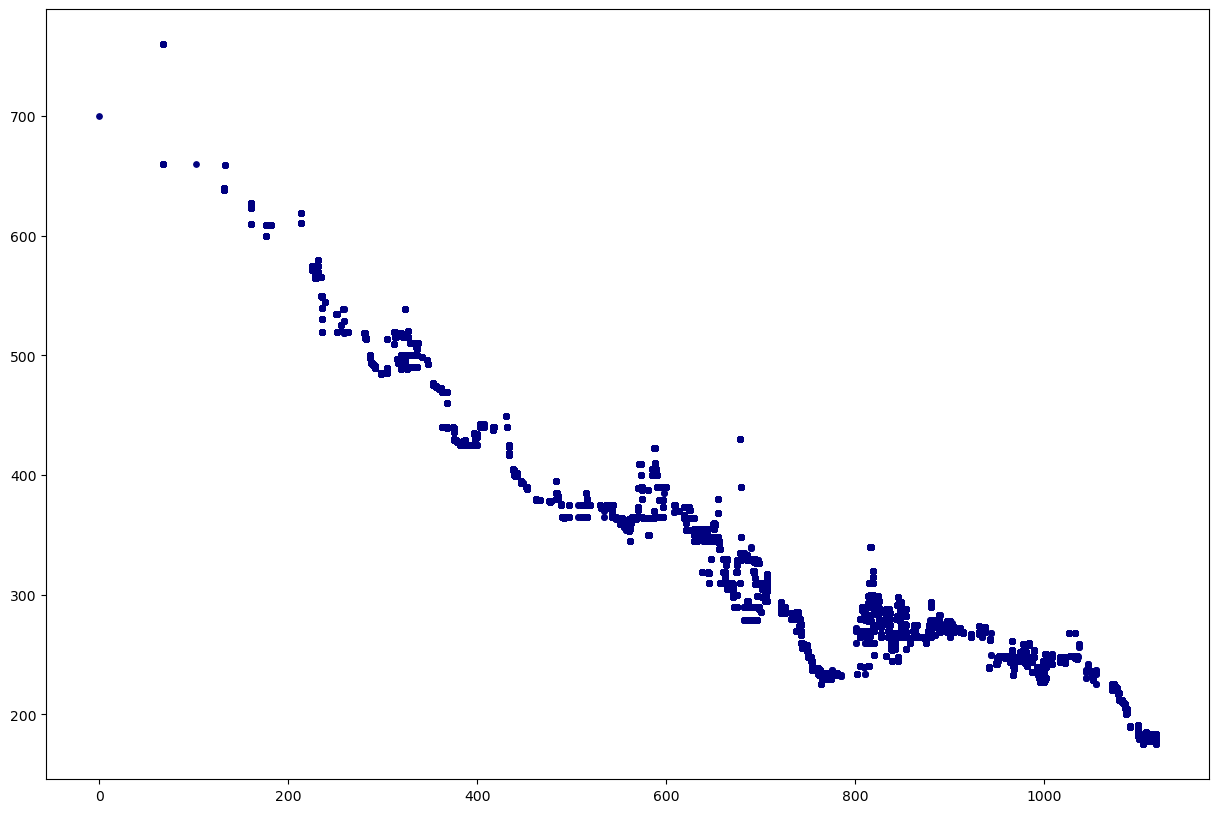

In [187]:
plt.figure(figsize=(15,10))
plt.scatter(Keepa_iP8.Day.values, 
            Keepa_iP8['iPhone'].values, 
            color='navy', s=15, marker='o', label="training points")
plt.show()

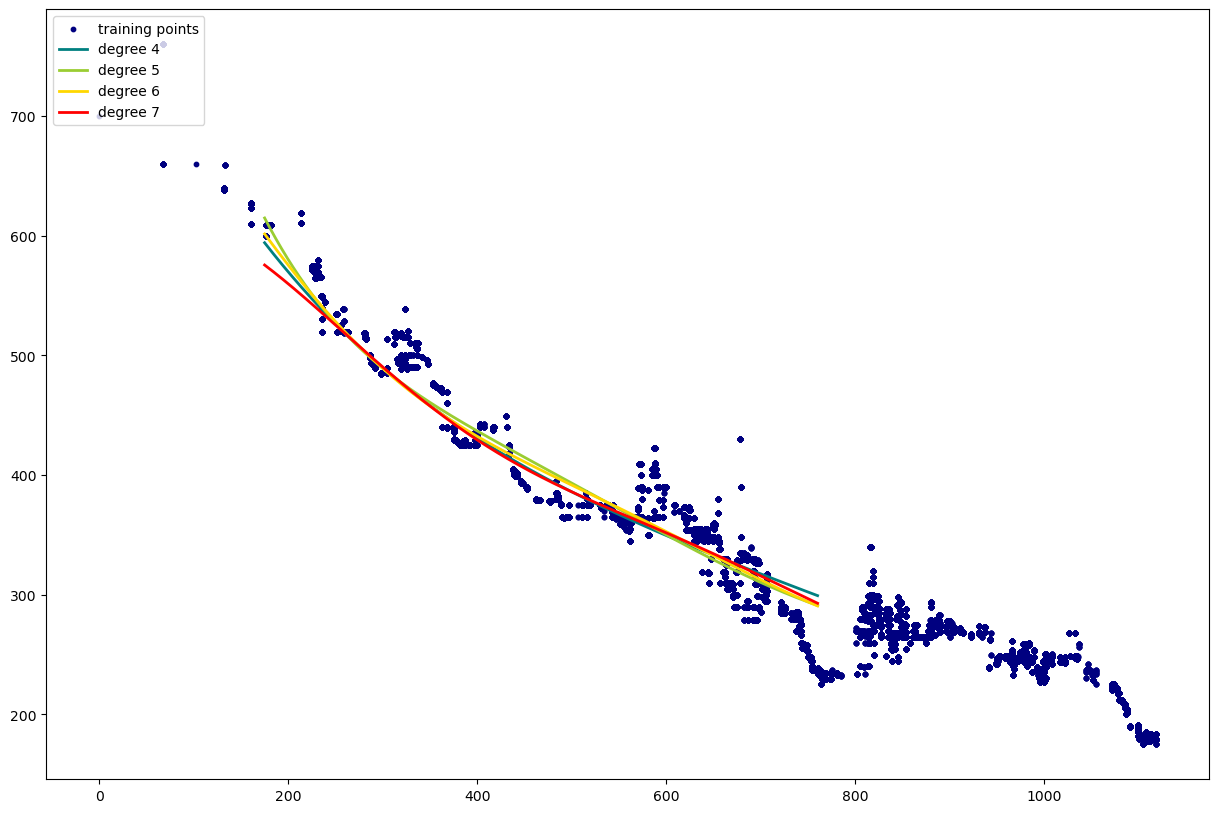

In [188]:
plt.figure(figsize=(15,10))
plt.scatter(Keepa_iP8.Day, Keepa_iP8['iPhone'], color='navy', s=10, marker='o', label="training points")

plt.plot(x_plot.sampled, y_plot_4, color='teal', linewidth=2,
             label="degree 4")
plt.plot(x_plot.sampled, y_plot_5, color='yellowgreen', linewidth=2,
             label="degree 5")
plt.plot(x_plot.sampled, y_plot_6, color='gold', linewidth=2,
             label="degree 6")
plt.plot(x_plot.sampled, y_plot_7, color='red', linewidth=2,
             label="degree 7")
plt.legend(loc='upper left')
plt.show()

In [163]:
model_selection.train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [168]:
Keepa_iP = pd.read_csv('all_data.csv')
Keepa_iP8 = Keepa_iP[['Day', 'Apple iPhone 8']]
Keepa_iP8.columns =['Day', 'iPhone']
iPhone_train, iPhone_test = model_selection.train_test_split(Keepa_iP8,  test_size = 0.75, random_state=42)

In [169]:
for degree in range(1,30):
    model = linear_model.LinearRegression()
    col_poly_train = create_poly_feature(iPhone_train, 'Day', degree)
    sales_train_processed = pd.concat([iPhone_train, col_poly_train], axis=1)
    
    train_X = sales_train_processed.drop('iPhone', axis=1).values
    train_Y = sales_train_processed['iPhone'].values
    model.fit(train_X, train_Y)
    
    col_poly_test = create_poly_feature(iPhone_test, 'Day', degree)
    sales_test_processed = pd.concat([iPhone_test, col_poly_test], axis=1)
    
    test_X = sales_test_processed.drop('iPhone', axis=1).values
    test_Y = sales_test_processed['iPhone'].values
    
    test_Y_fit = model.predict(test_X)
    
    print("degree %d, square root of mean squared error: %.2f, R2 score: %.2f"
      % (degree, np.sqrt(metrics.mean_squared_error(test_Y, test_Y_fit)), metrics.r2_score(test_Y,test_Y_fit)))

degree 1, square root of mean squared error: 17.22, R2 score: 0.95
degree 2, square root of mean squared error: 14.20, R2 score: 0.96
degree 3, square root of mean squared error: 13.84, R2 score: 0.97
degree 4, square root of mean squared error: 13.76, R2 score: 0.97
degree 5, square root of mean squared error: 13.28, R2 score: 0.97
degree 6, square root of mean squared error: 13.43, R2 score: 0.97
degree 7, square root of mean squared error: 13.98, R2 score: 0.97
degree 8, square root of mean squared error: 14.79, R2 score: 0.96
degree 9, square root of mean squared error: 15.77, R2 score: 0.96
degree 10, square root of mean squared error: 16.88, R2 score: 0.95
degree 11, square root of mean squared error: 18.23, R2 score: 0.94
degree 12, square root of mean squared error: 25.19, R2 score: 0.89
degree 13, square root of mean squared error: 28.39, R2 score: 0.86
degree 14, square root of mean squared error: 31.83, R2 score: 0.82
degree 15, square root of mean squared error: 35.09, R2 s

In [ ]:
###Try on 